In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
ruta = 'mammalia-voles-bhp-trapping.edges'

G = nx.from_pandas_edgelist(pd.read_csv(ruta, sep = ' ', header = None), source = 0, target = 1)

print(len(G.nodes), len(G.edges))

1686 4623


Ahora analizamos la red con múltiples componentes

In [3]:
nx.is_connected(G)

False

Nos dice que no está conectada. ¿Qué pasaría si la graficamos? 

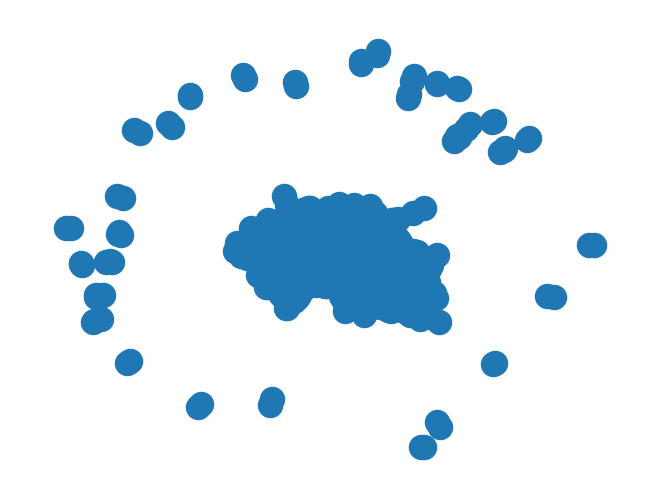

In [4]:
nx.draw(G)

In [5]:
nx.connected_components(G)
# Nos regresa un generador de componentes conectados
# Podemos convertirlo en una lista
list(nx.connected_components(G)) # Nos regresa una lista de conjuntos de nodos 

[{1, 2},
 {3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  104,
  105,
  106,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  1

In [6]:
for c in nx.connected_components(G):
    print(c)
# Visitamos cada componente conectado y lo imprimimos

{1, 2}
{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 2

Un análisis muy útil es la máxima de la componente, para ello primero haremos un análisis componente con componente

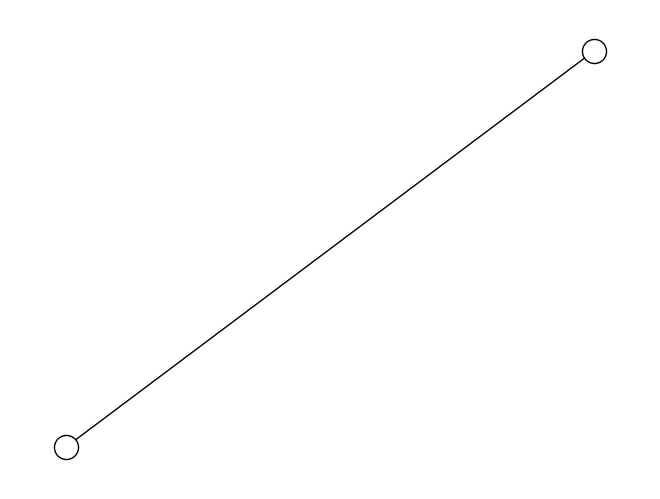

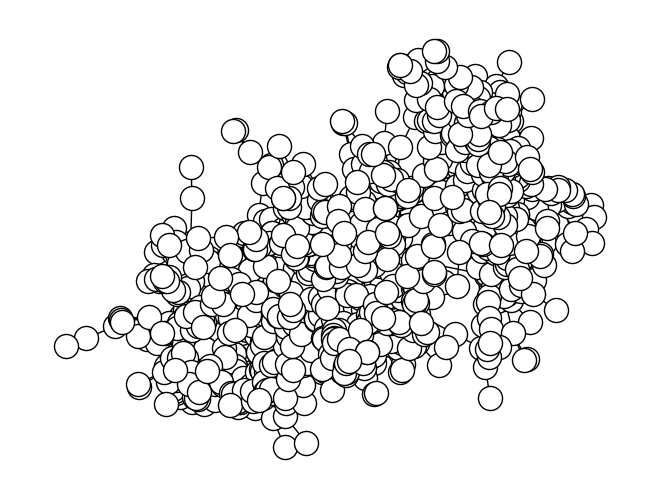

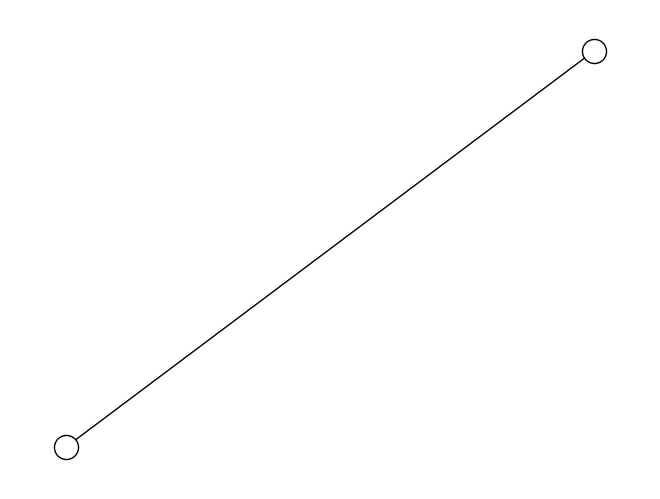

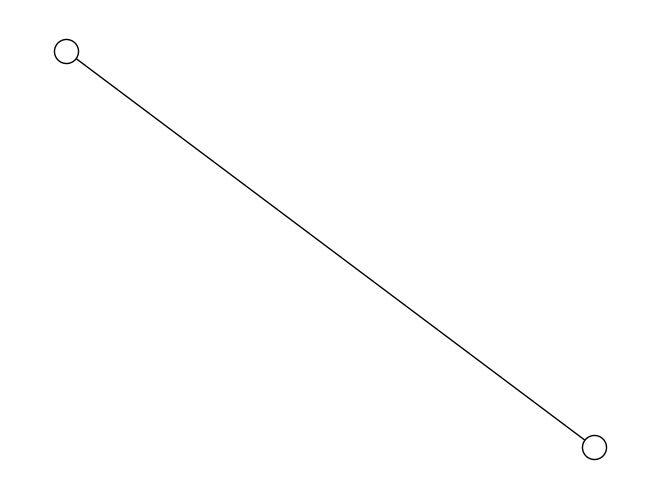

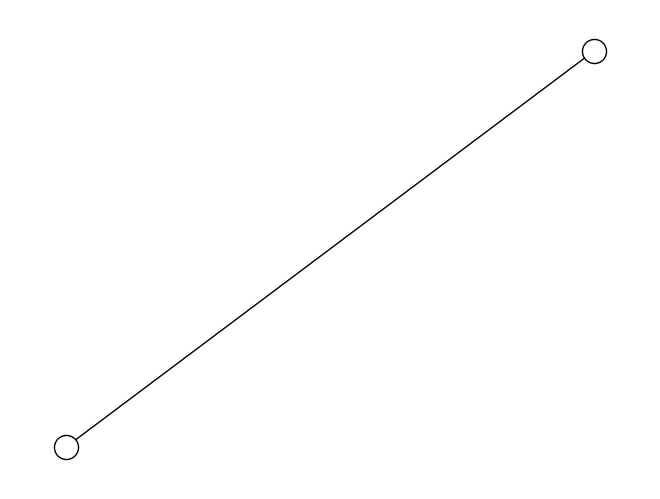

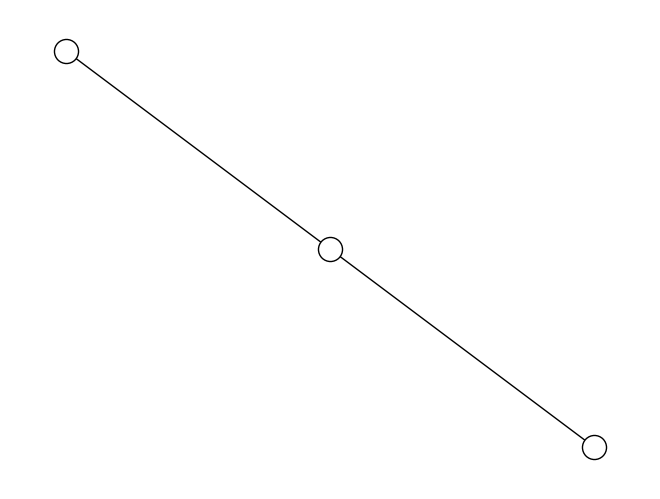

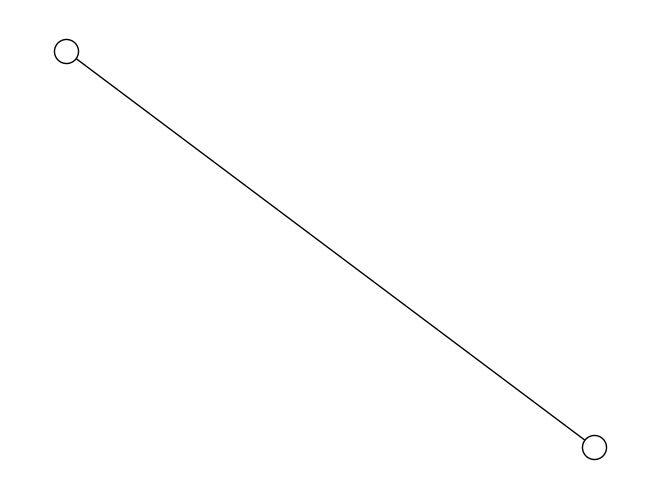

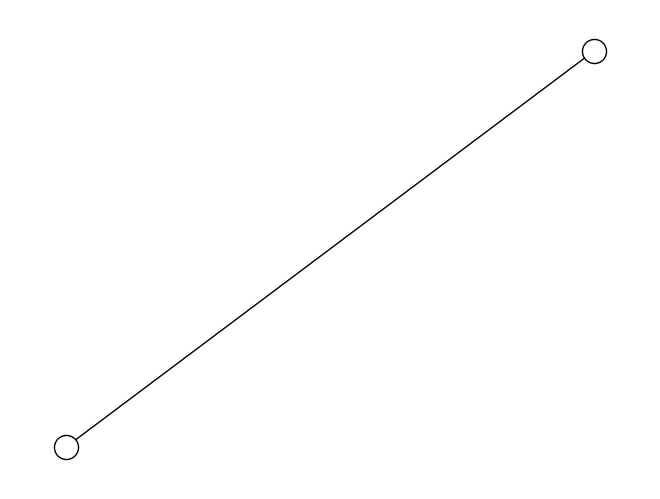

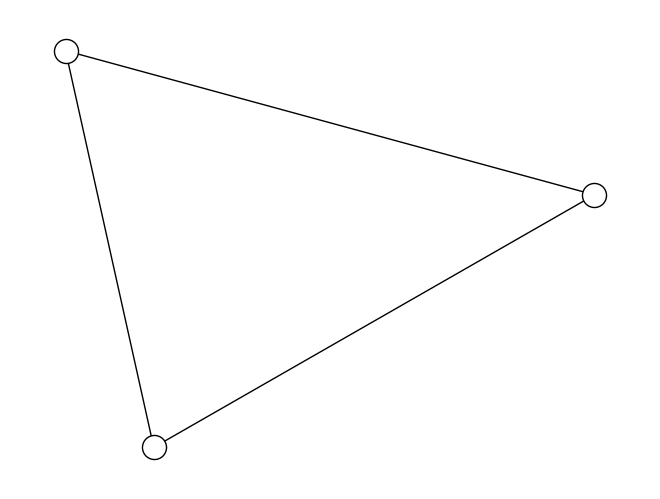

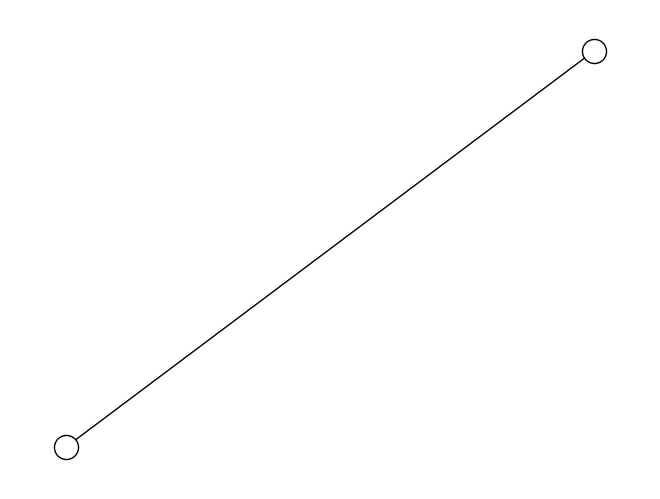

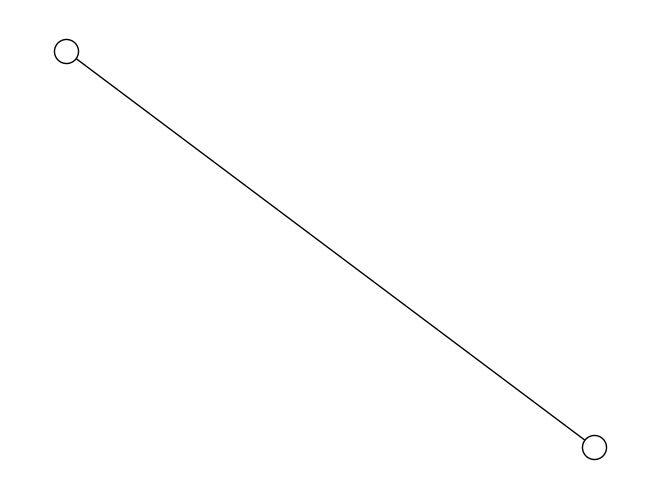

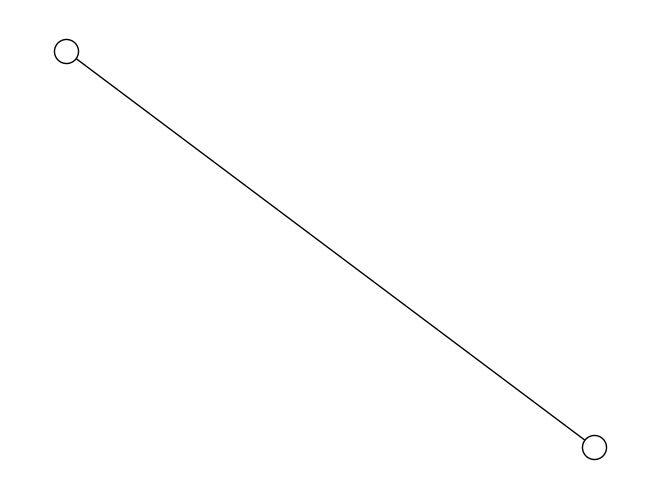

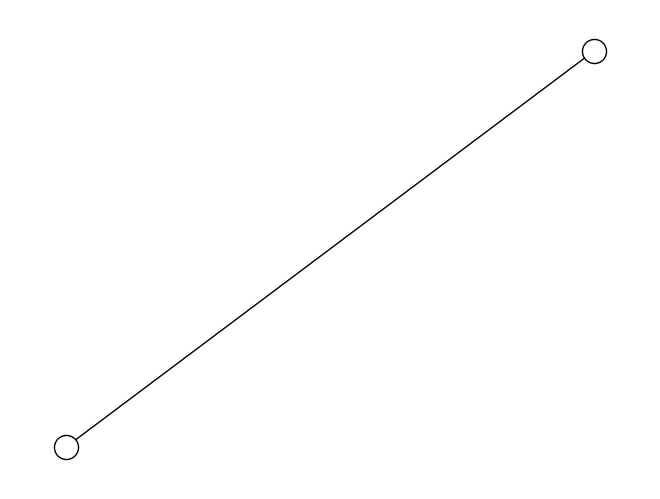

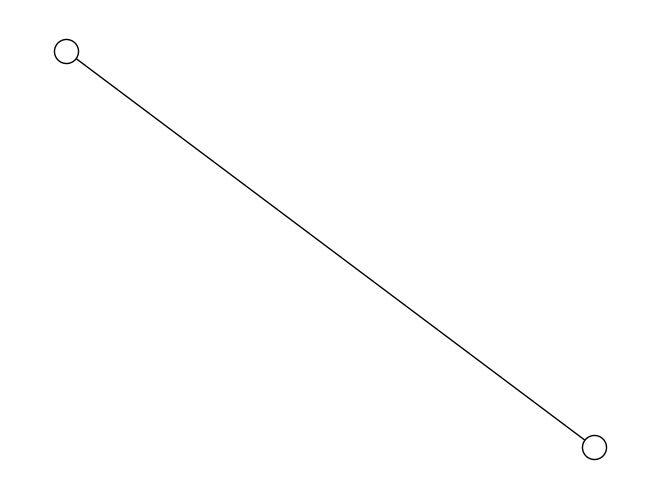

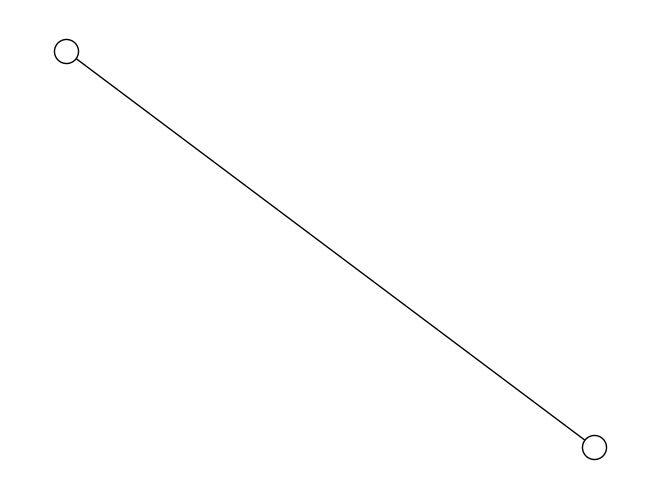

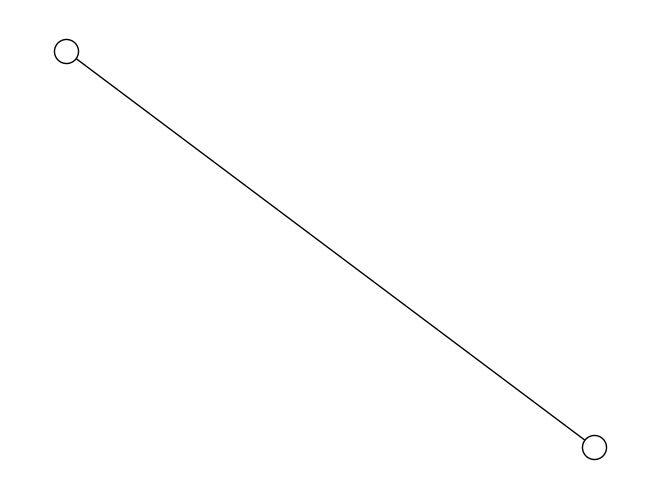

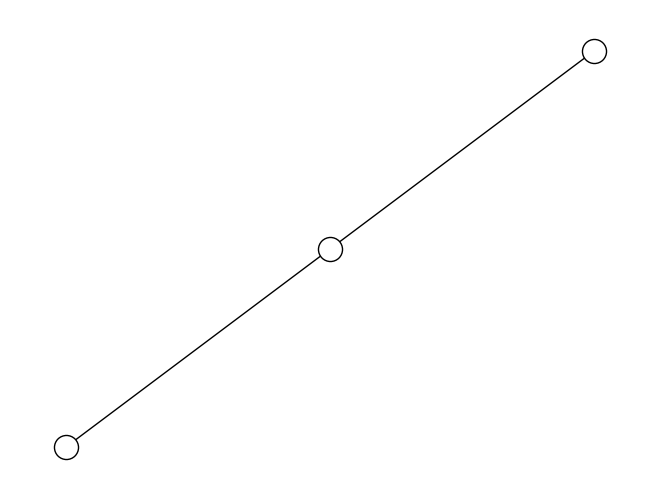

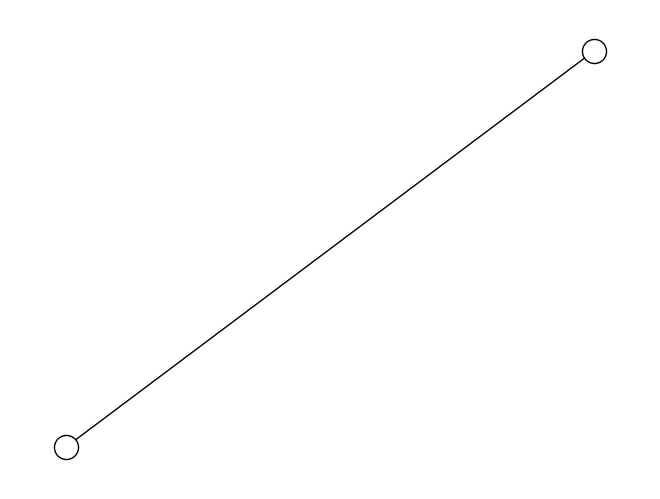

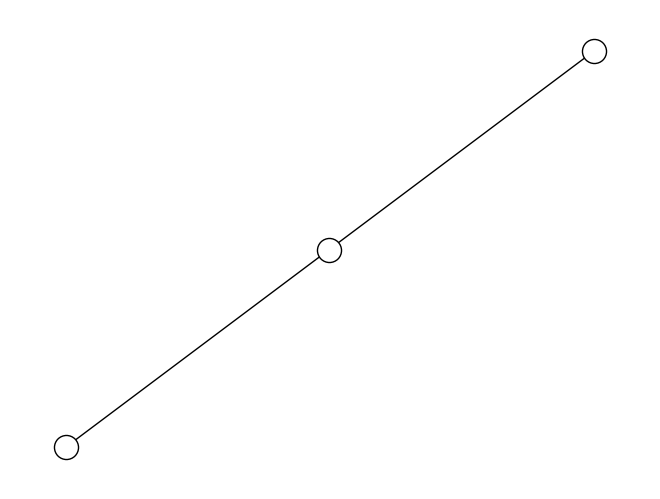

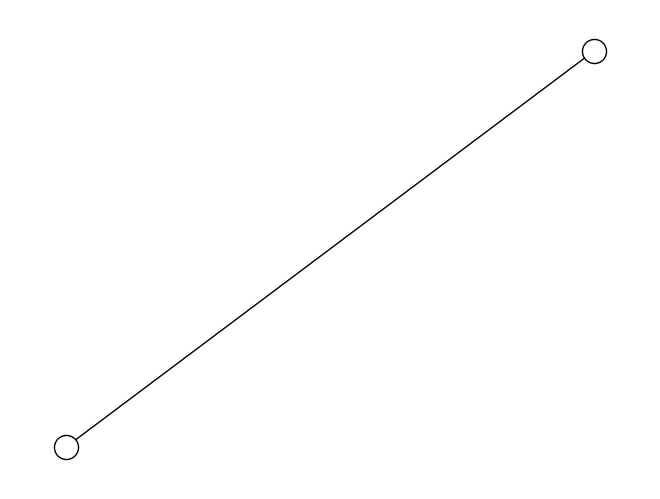

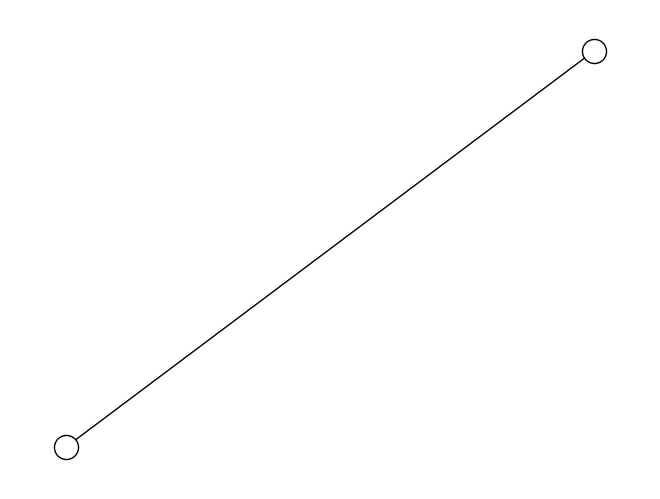

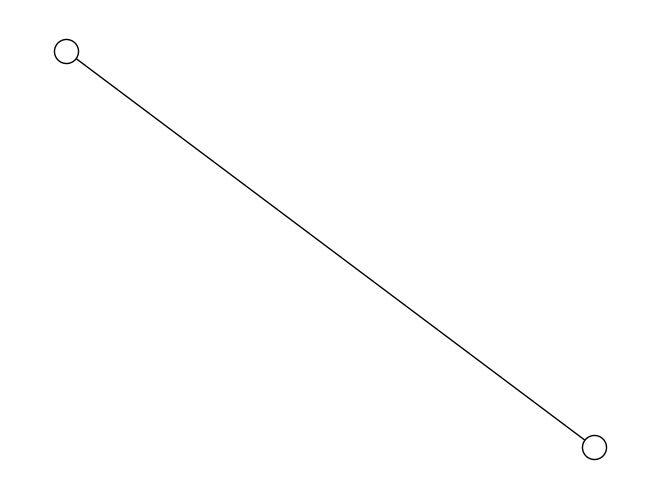

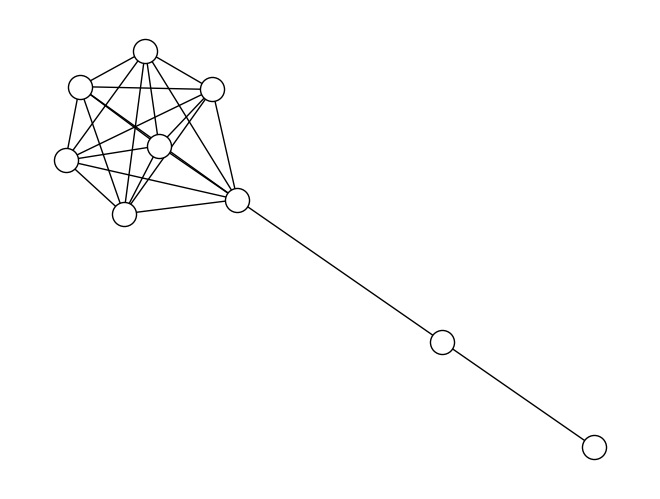

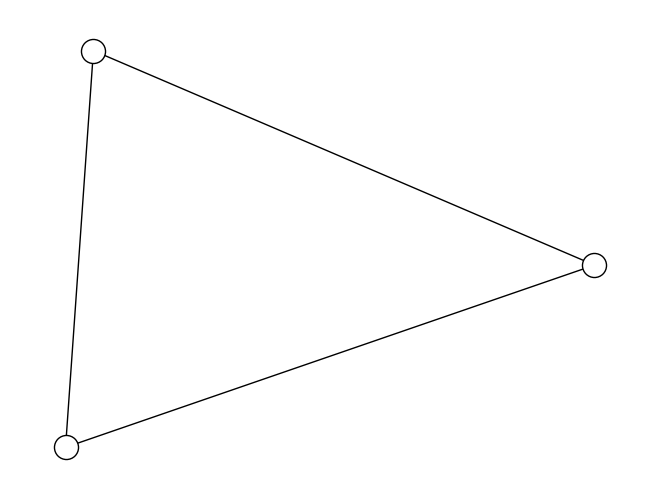

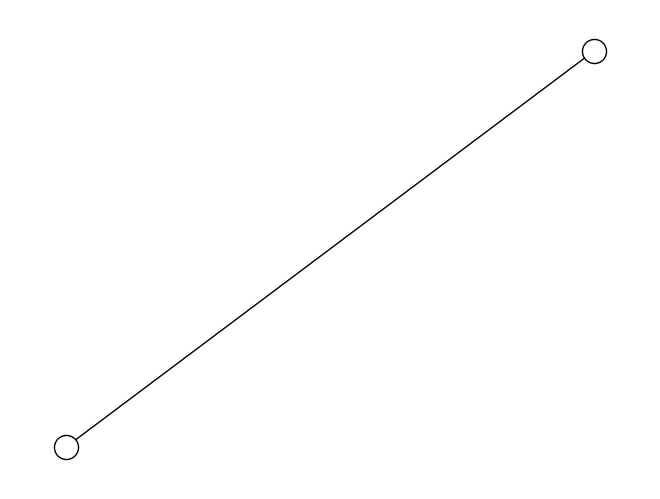

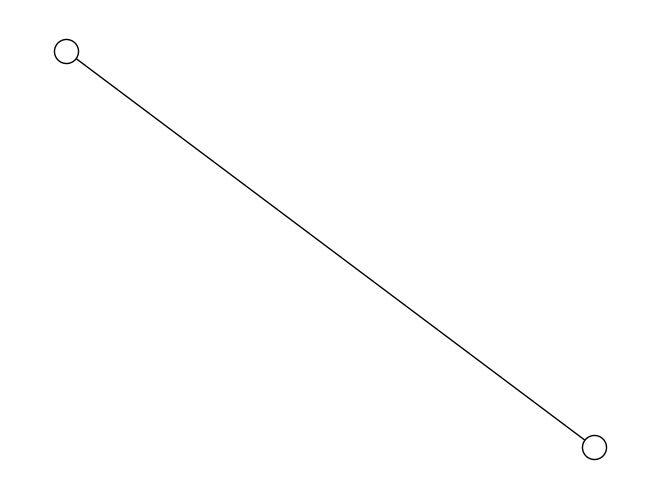

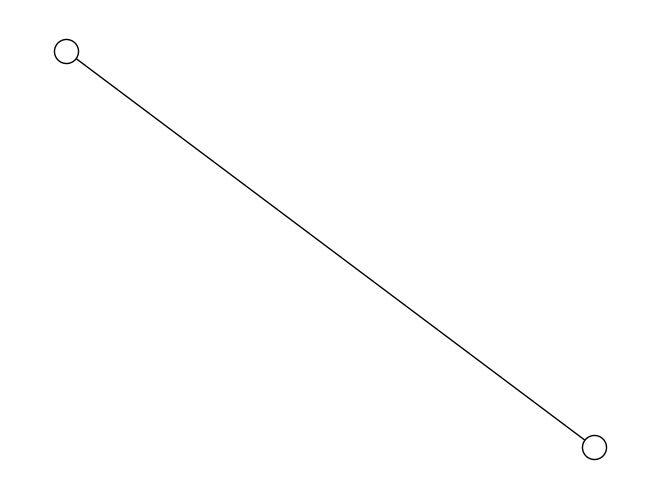

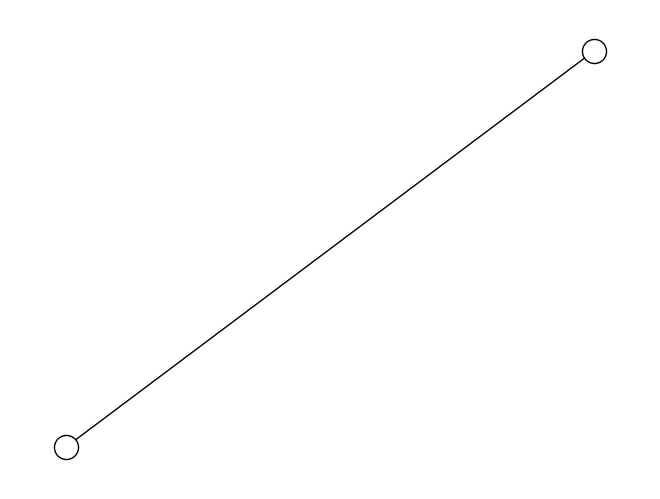

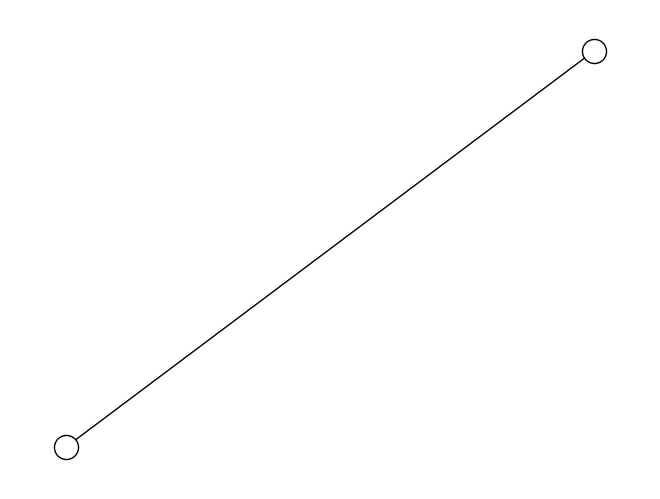

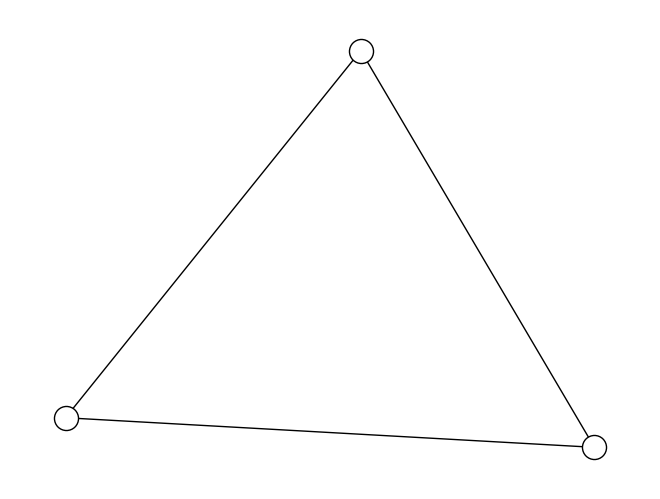

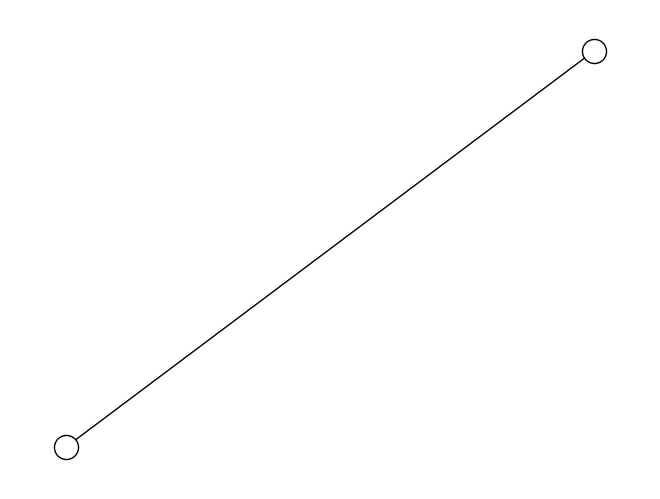

In [7]:
for c in nx.connected_components(G):
    Gc = nx.subgraph(G, c) # Creamos un subgrafo de G con los nodos de c
    # print(len(Gc.nodes), len(Gc.edges))
    nx.draw(Gc, edgecolors = 'black', node_color = 'white')
    plt.show()

In [8]:
# Ahora generamos un diccionario
hist = {len(c):0 for c in nx.connected_components(G)}

for c in nx.connected_components(G):
    Gc = nx.subgraph(G, c)
    hist[len(Gc)] += 1

hist


{2: 23, 1613: 1, 3: 6, 9: 1}

In [9]:
X = hist.keys()
Y = hist.values()

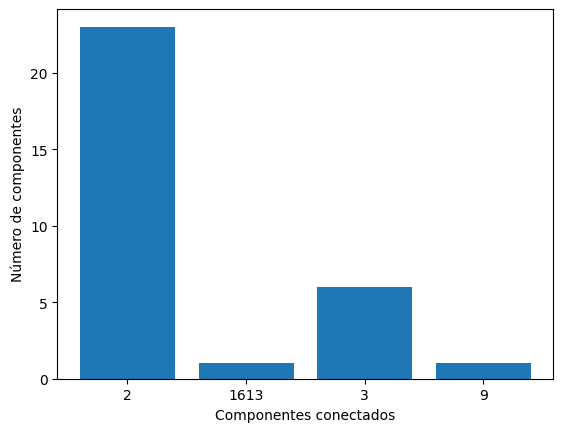

In [10]:
plt.bar([0,1,2,3],Y)
plt.xticks([0,1,2,3],X)
plt.xlabel('Componentes conectados')
plt.ylabel('Número de componentes')
plt.show()

## Análisis de la máxima componente

La distancia promedio nos interesa.

In [11]:
max([c for c in nx.connected_components(G)])

{1, 2}

In [12]:
listas = [[10,2,3,4],[1000],[1,2,3,4,5,6,7,8,9,10]]

In [13]:
# Vamos a checar cuál es el criterio de nuestra función max para saber con qué estamos trabajando
print(max(listas))
# Nos retorna el máximo valor de las listas que se tiene
# Vamos a redfinir el criterio de máximo
print(max(listas, key = len))


[1000]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [14]:
C_max = max(nx.connected_components(G), key = len)
Gn = nx.subgraph(G, C_max)

In [16]:
len(Gn.nodes), len(Gn.edges)

(1613, 4562)

In [17]:
2*len(Gn.edges)/len(Gn)

5.656540607563546

In [18]:
# Promedio de las amistades de un nodo estan conectadas entre sí
nx.average_clustering(Gn)   # Este es un clustering bastante alto en las redes naturales

0.4724067762748272

In [19]:
nx.closeness_centrality(Gn)


{3: 0.11774158206120809,
 4: 0.1177243847221208,
 5: 0.13195808775376555,
 6: 0.12419106317411402,
 7: 0.105359477124183,
 8: 0.1177243847221208,
 9: 0.12172468473910746,
 10: 0.12135812692915757,
 11: 0.13848797250859107,
 12: 0.13894156179968972,
 13: 0.14108174339226326,
 14: 0.15160349854227406,
 15: 0.1446258747532747,
 16: 0.15919415366383566,
 17: 0.1663399030027861,
 18: 0.14274329230496768,
 19: 0.14737611994880234,
 20: 0.16475878986099754,
 21: 0.09532257110756312,
 22: 0.1375778782964923,
 23: 0.14682575826578012,
 24: 0.14812092253974088,
 25: 0.12906325060048038,
 26: 0.11773298276365761,
 27: 0.15714564242542406,
 28: 0.13700492945775963,
 29: 0.1387741046831956,
 30: 0.18237357167100351,
 31: 0.16739356178608514,
 32: 0.14577681316693797,
 33: 0.12906325060048038,
 34: 0.12545723402599424,
 35: 0.10533882245311377,
 36: 0.11771578793632248,
 37: 0.13191489361702127,
 38: 0.13172086942310834,
 39: 0.1373317430567388,
 40: 0.14485981308411214,
 41: 0.1075670625917523,
 42

In [21]:

# Ahora sacamos el promedio

sum(nx.closeness_centrality(Gn).values())/len(Gn)

0.15580082041752596